In [3]:
# First of all we import the most important class: LogNegManager. We will communicate with the suite only with this class
# The rest of imports are made to ensure that typewriting is correct, but can be omitted

import sys
import os
repoRoot = os.path.abspath(os.path.join('..'))
sys.path.append(repoRoot)

from src.LogNegManager import LogNegManager
from src.TypesAndParameters import TypeOfMeasurement, InitialStateParameters, TransformationMatrixParameters, MeasurementParameters, GeneralOptionsParameters

In [11]:

# The generalOptions dictionary allow for defining the number of modes that we will have and the directories to use. Also it allow for activating the parallelize option
generalOptions =  {
        GeneralOptionsParameters.NUM_MODES.value: 10,
        GeneralOptionsParameters.PLOTS_DIRECTORY.value: "./plots/10-plots/",
        GeneralOptionsParameters.DATA_DIRECTORY.value: "./data/10-data/",
        GeneralOptionsParameters.BASE_DIRECTORY.value: "../",
        GeneralOptionsParameters.PARALLELIZE.value: True
      }

# If we will obtain the transformation matrix from normalized data (the one from DyNCHE-toolbox) we have to tell the directory to look at as well as the time instant to get.
# If another kind of Bogoliubov matrix wants to be used, leave this dictionary as {} and introduce the np.ndarray corresponding to the matrix when calling LogNegManager
transformationMatrixOptions = {
        TransformationMatrixParameters.DATA_DIRECTORY.value: "../example_data/10modes/",
        TransformationMatrixParameters.INSTANT_TO_PLOT.value: -1
      }

# Here we define a list of the different initial states on which we want to perform the Bogoliubov transformation
# Each state has a temperature if we want to do it thermal, if not is sufficient to enter 0.0 or not introducing the key for temperature
# Squeezing is also allowed for one mode and two mode squeezing, but both cannot be different from zero at the same time
initialStates = [
          {InitialStateParameters.TEMPERATURE.value:  0.0,
          InitialStateParameters.ONE_MODE_SQUEEZING.value: 0.0,
            InitialStateParameters.TWO_MODE_SQUEEZING.value: 0.0},
            {InitialStateParameters.TEMPERATURE.value:  0.1,
          InitialStateParameters.ONE_MODE_SQUEEZING.value: 0.0,
            InitialStateParameters.TWO_MODE_SQUEEZING.value: 0.0},
            {InitialStateParameters.TEMPERATURE.value:  0.5,
          InitialStateParameters.ONE_MODE_SQUEEZING.value: 0.0,
            InitialStateParameters.TWO_MODE_SQUEEZING.value: 0.0},
            {InitialStateParameters.TEMPERATURE.value:  1.0,
          InitialStateParameters.ONE_MODE_SQUEEZING.value: 0.0,
            InitialStateParameters.TWO_MODE_SQUEEZING.value: 0.0},
            {InitialStateParameters.TEMPERATURE.value:  1.25,
          InitialStateParameters.ONE_MODE_SQUEEZING.value: 0.0,
            InitialStateParameters.TWO_MODE_SQUEEZING.value: 0.0},
            {InitialStateParameters.TEMPERATURE.value:  1.5,
          InitialStateParameters.ONE_MODE_SQUEEZING.value: 0.0,
            InitialStateParameters.TWO_MODE_SQUEEZING.value: 0.0},
            {InitialStateParameters.TEMPERATURE.value:  1.70,
          InitialStateParameters.ONE_MODE_SQUEEZING.value: 0.0,
            InitialStateParameters.TWO_MODE_SQUEEZING.value: 0.0},

        ]

# Define the kind of entanglement measure that will be perform for each state specified above
# Each measurement in the list will be a different data file and different figure
# Define the type of measurement and the type of state to apply on (0 for states before the main transformation, 1 for outstates after the transformation)
# For most of the measurements one can choose to focus on just few modes by introducing modesToApply as a list of modes (from 1 to numModes)
measurements = [
        {MeasurementParameters.TYPE.value: TypeOfMeasurement.HawkingPartner.value,
        MeasurementParameters.SPECIAL_INFO.value: "B1"},
        {MeasurementParameters.TYPE.value: TypeOfMeasurement.FullLogNeg.value}
      ]

In [12]:
# Instantiate the Manager to make everything works
LNManager = LogNegManager(generalOptions=generalOptions, transformationDict=transformationMatrixOptions,
                              initialStates=initialStates)

In [14]:
matrix = LNManager.listOfSimulations[0].transformationMatrix
transformationMatrixOptions  = {TransformationMatrixParameters.PRECOMPUTED_MATRIX.value: matrix}

LNMAnager2 = LogNegManager(generalOptions=generalOptions, transformationDict=transformationMatrixOptions,
                              initialStates=initialStates)


In [15]:
# For each kind of measurement in the list, a dict will be create (and saved as an .npz file)
# This dict is used as an input later for plotting
collection_of_dict_to_plot = []
for measurement in measurements:
    collection_of_dict_to_plot.append(LNMAnager2.measureEntanglement(measurement))

/home/josema/Documentos/universidad/granada/6Sexto/TFG/Scripts/LogNeg4gs/src/LogNegManager.py:109: UserWarning: Hawking-Partner formula only works for initial pure states. Computing usual Full log neg...
  warnings.warn(


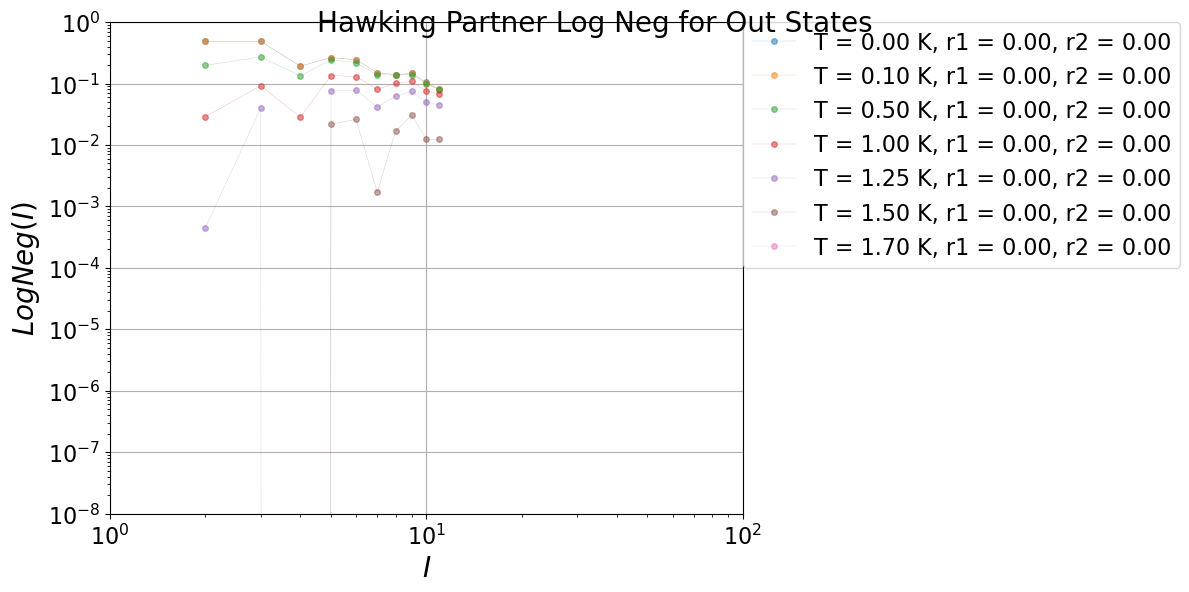

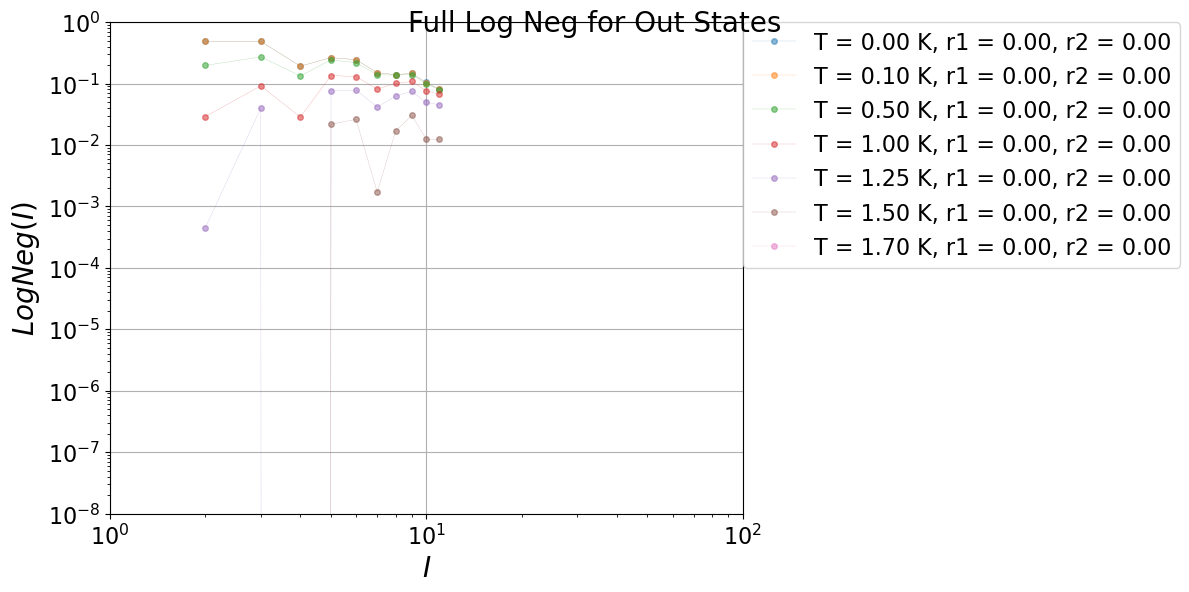

In [16]:
# Generate a plot for every measurement computed
for dict_to_plot in collection_of_dict_to_plot:
    LNMAnager2.plotResults(dict_to_plot)

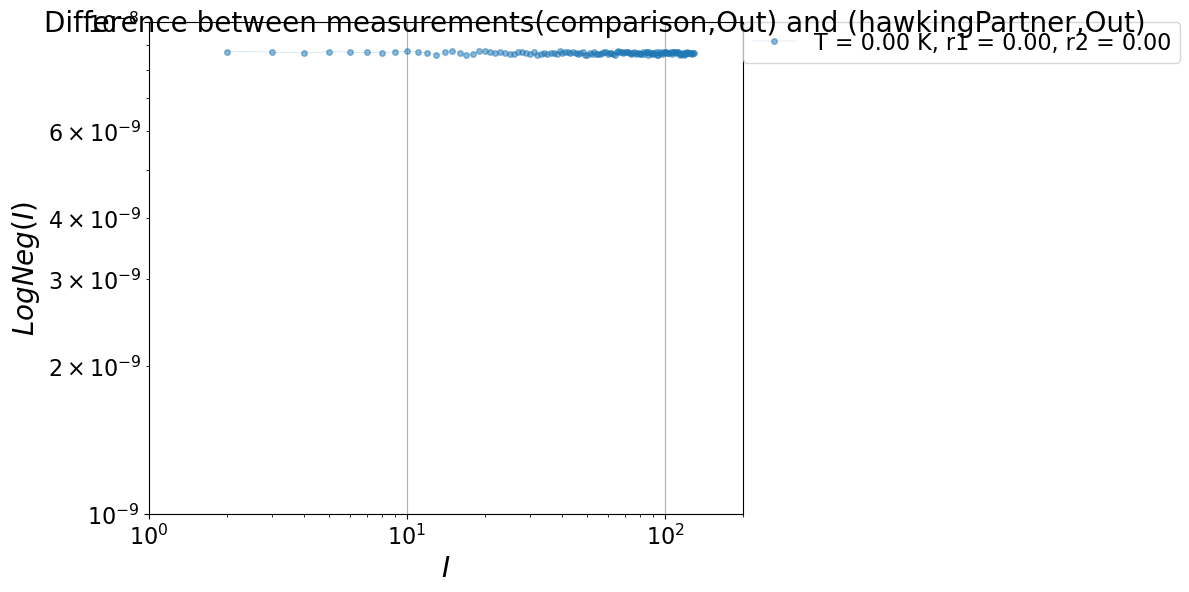

In [6]:
# We can compare directly by doing the following

comparisonDict = LNManager.computeDifferenceBetweenMeasurements(measurements[1], measurements[0])
LNManager.plotResults(comparisonDict)